In [13]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings

warnings.simplefilter('ignore')

In [14]:
df = pd.read_csv('titanic3.csv', sep=';')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
df.groupby('sex')['sex'].count()

sex
female    466
male      843
Name: sex, dtype: int64

In [16]:
survived = df.groupby('survived')['survived'].count()
print(survived)
print(f"There are {survived.loc[1]/survived.sum()*100:.1f}% survived passengers")

survived
0.0    809
1.0    500
Name: survived, dtype: int64
There are 38.2% survived passengers


In [17]:
pclass = df.groupby('pclass')['pclass'].count()
print(pclass)
print(f"There are {pclass.loc[1]/pclass.sum()*100:.1f}% 1st class passengers")

pclass
1.0    323
2.0    277
3.0    709
Name: pclass, dtype: int64
There are 24.7% 1st class passengers


In [56]:
ages = df['age'].map(lambda x: x.replace(',', '.') if isinstance(x, str) else x).astype(float)
ages

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
1309        NaN
Name: age, Length: 1310, dtype: float64

In [57]:
# средний возраст
round(ages.mean(), 1)

29.9

In [58]:
# медианный возраст
round(ages.median(), 1)

28.0

In [63]:
# коэффициент корреляции Пирсона / pvalue
sibsp = df['sibsp'].dropna()
parch = df['parch'].dropna()

print(scipy.stats.pearsonr(sibsp, parch))

PearsonRResult(statistic=0.37358719062649304, pvalue=1.278717771629116e-44)


In [64]:
# pvalue << 0,001; статистически значимая зависимость

Text(0, 0.5, 'Density')

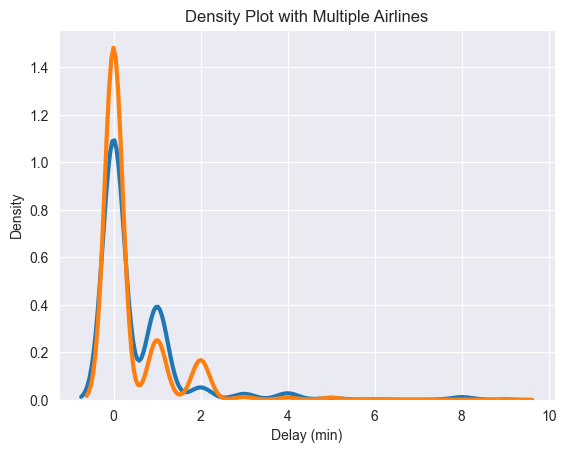

In [81]:

# Iterate through the five airlines
for sub in [sibsp, parch]:
    # Draw the density plot
    sns.distplot(sub, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = sub.name)

# Plot formatting
plt.legend = 'data'
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')